In [97]:
using Pkg
Pkg.add("TickTock")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
using DelimitedFiles
using Random
using DataFrames
using Statistics
using CSV
using TickTock
using Plots

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.7/Project.toml`
  No Changes to `/opt/julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed GR_jll ─────────────────────── v0.64.0+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed Measures ───────────────────── v0.3.1
   Installed RelocatableFolders ─────────── v0.1.3
   Installed EarCut_jll ──────

  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_libXinerama_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXi_jll
  ✓ Cairo_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ HarfBuzz_jll
  ✓ GLFW_jll
  ✓ xkbcommon_jll
  ✓ ColorTypes
  ✓ libass_jll
  ✓ Qt5Base_jll
  ✓ GeometryBasics
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ Colors
  ✓ GR
  ✓ ColorSchemes
  ✓ PlotUtils
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ Plots
  102 dependencies successfully precompiled in 102 seconds (47 already precompiled)


In [53]:
function get_custo(instancia)
    tamanho = size(instancia)
    matrix_custo = zeros(Int, tamanho)
    for linha in 2:tamanho[1]
        for coluna in 2:tamanho[2]
            matrix_custo[linha, coluna] = instancia[linha, coluna] + max(matrix_custo[linha-1, coluna], matrix_custo[linha, coluna-1])
        end
    end
    return matrix_custo[tamanho[1], tamanho[2]]
end

get_custo (generic function with 1 method)

In [77]:
function get_vizinho_one_shift(instancia)
    quantidade_linhas = size(instancia)[1]
    vizinho = copy(instancia)
    origem = rand(1:quantidade_linhas)
    destino = rand(1:quantidade_linhas)
    vizinho[origem, :], instancia[destino, :] = instancia[destino, :], instancia[origem, :]
    return vizinho
end

get_vizinho_one_shift (generic function with 1 method)

In [265]:
instancias = []
prefixo = "pfssp/data/fs/"
for index in 1:69
    
    nome = "ta" * string(index, pad=3) 
    instancia = readdlm(prefixo*nome, Int, skipstart=1)
    instancia = instancia[:, setdiff(1:end, [column 
                                        for column in 1:size(instancia)[2] if (column % 2) == 1])]
    push!(instancias, (nome, instancia))
end

### Questão 3-a

In [ ]:
function get_melhor_vizinho(is_first_improved, custo, solucao)
    menor_custo = custo
    melhor_vizinho = copy(solucao)
    for _ in 1:20
        vizinho = get_vizinho_one_shift(solucao)
        custo = get_custo(vizinho)
        if custo < menor_custo
            menor_custo = custo
            melhor_vizinho = vizinho
            if is_first_improved
                break
            end
        end
    end
    return melhor_vizinho, menor_custo
end

In [266]:
resultados = []
for (nome, instancia) in instancias
    for is_first_improved in [true, false]
        if is_first_improved
            alg = "FI"
        else
            alg = "BI"
        end
        tick()
        solucao = instancia
        menor_custo = get_custo(instancia)
        for iteracao in 1:100
            tick()
            solucao, menor_custo = get_melhor_vizinho(is_first_improved, menor_custo, solucao)
            tempo = tok()
            push!(resultados, tuple(alg, nome, iteracao, round(tempo, digits=6), "NA", menor_custo))
        end
    end
end

┌ Info:  started timer at: 2022-03-02T18:04:30.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.816
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.832
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.833
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.841
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.849
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.856
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.856
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.856
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.856
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.856
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.857
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.857
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.857
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.857
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.864
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.872
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.873
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.880
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.881
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.888
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.889
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.889
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.889
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.889
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.889
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.897
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.898
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.898
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.898
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.905
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.906
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.906
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.912
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.913
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.920
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.927
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.933
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.933
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.933
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.933
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.934
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.934
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.934
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.934
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.934
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.942
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.942
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.942
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.943
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.951
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.951
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.951
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.951
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.951
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.952
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.952
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.952
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.952
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.960
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.961
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.968
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.969
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.977
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.978
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.978
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.988
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.989
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:30.996
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:30.997
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.028
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.035
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.036
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.036
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.043
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.050
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.060
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.060
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.060
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.061
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.072
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.072
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.072
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.072
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.072
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.073
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.073
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.073
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.073
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.082
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.082
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.082
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.082
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.083
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.093
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.094
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.102
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.102
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.103
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.111
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.112
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.112
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.123
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.123
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.123
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.123
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.123
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.124
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.124
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.124
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.124
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.131
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.139
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.140
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.147
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.192
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.193
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.193
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.193
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.206
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.207
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.218
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.218
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.218
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.218
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.218
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.219
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.219
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.219
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.219
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.232
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.233
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.242
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.243
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.251
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.252
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.252
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.259
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.259
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.260
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.267
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.268
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.277
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.285
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.293
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.294
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.294
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.301
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.346
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.346
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.347
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.358
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.358
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.358
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.358
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.359
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.359
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.368
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.369
└ @ T

┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.380
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.381
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.381
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.381
└ @ T

Excessive output truncated after 524304 bytes.┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:04:31.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  s

In [267]:
df_a = DataFrame(NamedTuple{(:alg, :instance, :rep, :time, :iterations, :value)}.(resultados));

In [242]:
CSV.write("resultados_tarefa3a.csv", df_a)

"resultados_tarefa3a.csv"

In [287]:
stats_a = combine(groupby(df_a, ["alg", "instance"]), [:time => sum  :value => minimum]);

#### Média e desvio padrão de tempo e custo em função da estratégia de busca local

In [291]:
combine(groupby(stats_a, "alg"), [:time_sum => mean, 
                                  :time_sum => std, 
                                  :value_minimum => mean,
                                  :value_minimum => std])

,alg,time_sum_mean,time_sum_std,value_minimum_mean,value_minimum_std
,String,Float64,Float64,Float64,Float64
1,FI,0.0111396,0.00578401,2071.62,1019.12
2,BI,0.0142224,0.00655675,1914.19,905.458


#### Histogramas

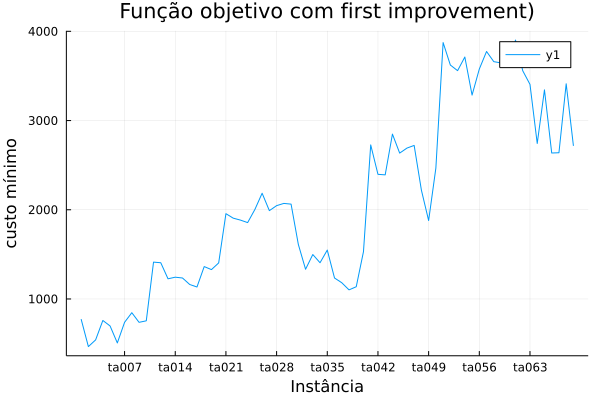

In [301]:
first_improved = stats_a[stats_a[!, "alg"] .== "FI", :];
plot(first_improved.instance, first_improved.value_minimum, 
    title="Função objetivo com first improvement)",
    xlabel = "Instância", ylabel="custo mínimo")

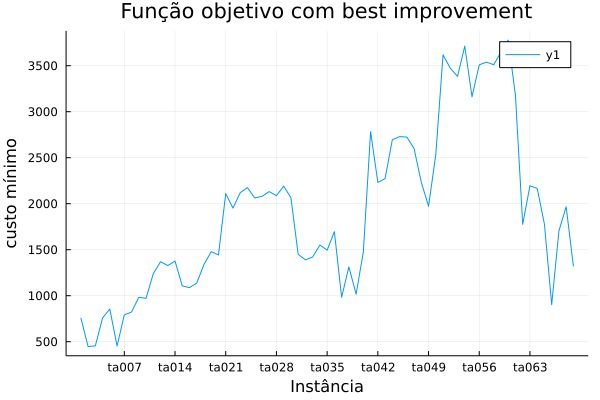

In [302]:
best_improved = stats_a[stats_a[!, "alg"] .== "BI", :];
plot(best_improved.instance, best_improved.value_minimum,
            title="Função objetivo com best improvement",
            xlabel = "Instância", ylabel="custo mínimo")

### Questão 3-b

In [270]:
function get_melhor_vizinho_busca_aleatoria(custo, solucao, probabilidade)
    menor_custo = custo
    melhor_solucao = copy(solucao)
    for _ in 1:20
        vizinho = get_vizinho_one_shift(solucao)
        custo = get_custo(vizinho)
        if custo < menor_custo
            menor_custo = custo
            melhor_solucao = vizinho
            if rand() < probabilidade
                break
            end
        end
    end
    return melhor_solucao, menor_custo
end

get_melhor_vizinho_busca_aleatoria (generic function with 2 methods)

In [282]:
resultados = []
for (nome, instancia) in instancias
    for probabilidade in [0.0, 0.05, 0.25, 0.5, 0.75, 1.0]
        solucao = instancia
        menor_custo = get_custo(instancia)
        for iteracao in 1:15
            tick();
            solucao, menor_custo = get_melhor_vizinho_busca_aleatoria(menor_custo, 
                                                                        solucao, 
                                                                        probabilidade)
            tempo = tok();
            push!(resultados, tuple(probabilidade, nome, iteracao, round(tempo, digits=6), "NA", menor_custo))
        end
    end
end

┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.041
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.050
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.051
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.051
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.051
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.051
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.058
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.059
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.066
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.067
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.067
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.075
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.076
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.076
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.083
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.084
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.092
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.093
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.093
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.093
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.100
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.100
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.101
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.109
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.110
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.110
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.110
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.117
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.118
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.126
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.127
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.127
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.135
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.135
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.135
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.136
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.136
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.136
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.137
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.137
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.137
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.148
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.149
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.149
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.149
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.159
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.160
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.161
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.161
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.161
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.188
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.189
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.200
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.200
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.200
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.200
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.200
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.201
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.201
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.201
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.201
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.211
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.212
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.213
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.213
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.223
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.233
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.234
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.234
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.234
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.234
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.234
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.243
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.243
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.243
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.244
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.252
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.252
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.253
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.260
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.261
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.261
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.261
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.268
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.269
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.269
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.275
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.276
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.283
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.283
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.284
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.291
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.291
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.292
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.326
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.326
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.326
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.327
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.336
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.336
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.336
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.336
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.337
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.337
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.337
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.337
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.337
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.353
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.353
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.354
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.363
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.364
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.373
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.373
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.374
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.388
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.389
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.390
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.390
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.400
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.400
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.400
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.401
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.408
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.414
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.415
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.432
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.433
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.441
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.442
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.451
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.451
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.451
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.451
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.452
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.452
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.452
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.452
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.452
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.461
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.462
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.470
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.470
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.470
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.470
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.471
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.471
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.471
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.471
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.471
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.479
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.480
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.488
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.488
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.488
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.488
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.489
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.489
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.489
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.489
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.489
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.497
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.497
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.497
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.498
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.506
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.507
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.508
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.516
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.517
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.526
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.527
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.528
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.528
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.537
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.538
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.538
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.562
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.563
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.563
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.563
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.572
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.573
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.583
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.583
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.583
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.584
└ @ T

┌ Info:  started timer at: 2022-03-02T18:08:07.593
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.593
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.594
└ @ T

Excessive output truncated after 524356 bytes.┌ Info:  started timer at: 2022-03-02T18:08:07.603
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  started timer at: 2022-03-02T18:08:07.604
└ @ TickTock /opt/julia/packages/TickTock/RsTHR/src/TickTock.jl:32
┌ Info:  s

In [283]:
df_b = DataFrame(NamedTuple{(:p, :instance, :rep, :time, :iterations, :value)}.(resultados));
CSV.write("resultados_tarefa3b.csv", df_b)

"resultados_tarefa3b.csv"

In [303]:
stats_b = combine(groupby(df_b, ["p", "instance"]), [:time => sum  :value => minimum]);

#### Média e desvio padrão de tempo e custo em função da probabilidade em descida aleatória

In [308]:
combine(groupby(stats_b, "p"), [:time_sum => mean, 
                                  :time_sum => std, 
                                  :value_minimum => mean,
                                  :value_minimum => std])

,p,time_sum_mean,time_sum_std,value_minimum_mean,value_minimum_std
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0020631,0.00145104,2711.09,1230.79
2,0.05,0.00220225,0.00227078,2752.28,1209.21
3,0.25,0.00197012,0.00278753,2826.62,1267.88
4,0.5,0.0016703,0.00165931,2928.72,1271.2
5,0.75,0.00162761,0.00143671,3009.03,1334.68
6,1.0,0.00130242,0.000593891,3051.29,1369.04
